<a href="https://colab.research.google.com/github/erberry/ThinkML/blob/main/tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安装依赖

本节主要使用 hugging face 的 transformers 库进行 tokenizer 体验。

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 使用 pipeline 一键进行“句子的情绪分类”

以下代码使用 hugging face 的 pipeline 包，对两个句子进行了情绪分类，即可以将句子体现了什么样的情绪（消极还是积极）计算出来。

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

输出结果如下：

```
[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]
```
结果显示第一句为积极情绪，第二句为消极情绪。

自然语言处理中，标记器(Tokenizer)是核心组件之一。它们有一个目的：将文本转换为模型可以处理的数据。模型只能处理数字，因此标记器(Tokenizer)需要将我们的文本输入转换为数字数据。

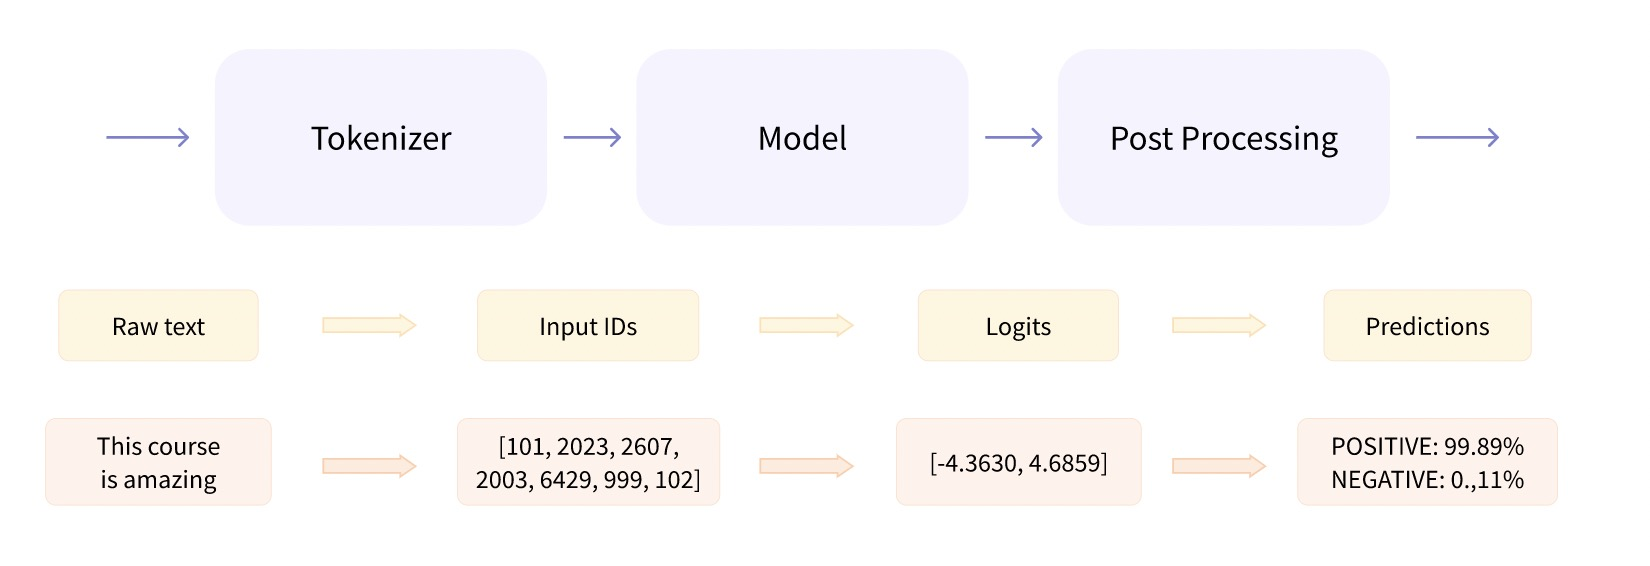

# tokenizer 详解

## 单独使用 tokenizer

使用 `pipeline("sentiment-analysis")` 进行文本情绪分类时，当前默认使用的模型是“distilbert-base-uncased-finetuned-sst-2-english”。

现在直接使用该模型的 tokenizer.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

使用 tokenizer 进行文本标记化，观察输出

In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


可以看到输出包含两部分数据：input_ids 和 attention_mask 。

input_ids 和 attention_mask 的类型为 tensor（张量） 。

张量是一种多维数组，是机器学习中最基本的数据结构。在 TensorFlow 和 PyTorch 这样的深度学习框架中，所有的输入和输出数据都被表示成张量的形式，模型的计算也是基于张量的运算来实现的。

input_ids 中的张量为两个数组：

`[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]`

`[  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]`

分别代表两个句子的数值表示。

由于计算机芯片只能处理数值类型的数据，所以很重要的一步就是需要将图文或者任何其他东西转换为数值。

在文本处理类模型中，tokenizer 的作用就是将文本中的字符转换为数值作为模型的输入，以及将模型输出的数值转为文本。

## tokenizer 步骤分解

以下将 tokenizer 分为两步运行：

1. 第一步：将文本拆分为字符
2. 第二步：将字符转换为数值

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1 = "I've been waiting for a HuggingFace course my whole life."
sequence2 = "I hate this so much!"

tokens1 = tokenizer.tokenize(sequence1) # 文本拆分
print(tokens1)
ids1 = tokenizer.convert_tokens_to_ids(tokens1) # 转为模型可识别的数值类型
print(ids1)

tokens2 = tokenizer.tokenize(sequence2)
print(tokens2)
ids2 = tokenizer.convert_tokens_to_ids(tokens2)
print(ids2)

input_ids = torch.tensor([ids1, ids2]) # 转为张量
# This line will fail.
model(input_ids)

['i', "'", 've', 'been', 'waiting', 'for', 'a', 'hugging', '##face', 'course', 'my', 'whole', 'life', '.']
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]
['i', 'hate', 'this', 'so', 'much', '!']
[1045, 5223, 2023, 2061, 2172, 999]


ValueError: ignored

上面是一个错误示例：由于两个句子进行文本拆分后，所得到的字符数组长度不一致，导致转换为ID后的 列表长度不一致。而机器学习模型对张量中的序列长度要求是需要一致。

直接使用 `tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")` 方法没有问题，是因为我们参数中设置了`padding=True`，即对长度不一致的序列进行填充。

通过 Padding 和 Attention masks 解决以上错误：

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

ids1 = [1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]
ids2 = [1045, 5223, 2023, 2061, 2172, 999] + [tokenizer.pad_token_id] * 8 # 使用pad填充，与第一个句子的长度对齐

input_ids = torch.tensor([ids1, ids2])

attention_mask = torch.tensor([
    [1] * 14,
    [1] * 6 + [0] * 8, # 告知模型后8个id是无效数据
])

model(input_ids,attention_mask=attention_mask)

SequenceClassifierOutput(loss=None, logits=tensor([[-2.7276,  2.8789],
        [ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

以上代码，我们手动使用tokenizer提供的pad_token_id对第二句话的id序列进行了填充。

并且设置了Attention masks，来告知模型哪些数据是有效的哪些是无效的。如果不设置Attention masks，模型将产生出不同的输出。

# 不同的分词器

几乎每一类别模型都配备有一个 tokenizer 。在使用模型时必须使用相应的 tokenizer 。
例如以下的 gpt2 模型必须使用 gpt2 的 tokenizer：

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Let’s do tokenization!"
print(tokenizer.tokenize(text))
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

['Let', 'âĢ', 'Ļ', 's', 'Ġdo', 'Ġtoken', 'ization', '!']


tokenizer 算法可以分为以下几种：
- 基于词的，按单词进行拆分，每个单词分配一个ID，会导致词表特别大；诸如dogs和dog还会被标记为不相关。
- 基于字符的，词表缩小，未知的词也可以支持（都能够使用字符构建），但拆分后的token太多。
- 子词标记化，常用单词不进行拆分，罕见词进行拆分。例如：“tokenization”被拆分为“token”和“ization”，这两部分都具有单独的语义。

## 中文分词器

与大部分印欧语系的语言不同，中文（同样的还有日韩文）在词与词之间没有任何空格之类的显示标志指示词的边界。因此，中文分词是很多自然语言处理系统中的基础模块和首要环节。

如：“我来到北京清华大学”，正常分词后是：“我/ 来到/ 北京/ 清华大学”，如果拆分成：”我来/ 到北/ 京/ 清华大学“，显然是不对的。

中文分词也有“基于字符的”和“子词标记化”的算法。

例如：bert-base-chinese 就使用了基于字符的算法，将每个中文字符分割为一个token

但是这种分词方式过于简单，对于一些复合词、新词或专有名词等情况会存在一定的切分歧义。

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
tokens = tokenizer.tokenize("我来到北京清华大学") # 文本拆分
print(tokens)

['我', '来', '到', '北', '京', '清', '华', '大', '学']


GPT系列模型则使用了子词标记法。
由于这种方法会将一个中文字符拆分开，所以打印出的字符都是乱码。

In [ ]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokens = tokenizer.tokenize("我来到北京清华大学") # 文本拆分
print(tokens)

['æĪ', 'ĳ', 'æĿ', '¥', 'åĪ', '°', 'åĮ', 'Ĺ', 'äº', '¬', 'æ', '¸', 'ħ', 'åį', 'İ', 'å¤§', 'åŃ', '¦']


在中文环境中，更常用的分词算法，可以概括为以下三种：

- 基于词表的分词算法
- 基于统计模型的分词算法
- 基于序列标注的分词方法

如 jieba 分词器使用了“基于词表的分词算法”

In [ ]:
!pip install jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jieba

seg_list = jieba.cut("我来到北京清华大学")
print("Default Mode: " + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.559 seconds.
DEBUG:jieba:Loading model cost 1.559 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Default Mode: 我/ 来到/ 北京/ 清华大学


THULAC 分词器使用了“基于序列标注的分词方法”

In [ ]:
!pip install thulac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
import thulac

thu1 = thulac.thulac(seg_only=True)
text = thu1.cut("我来到北京清华大学", text=True)
print(text)

Model loaded succeed
我 来 到 北京 清华大学


hanlp 分词器使用了“基于序列标注的分词方法”

In [ ]:
!pip install hanlp -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.1/651.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hanlp-common: filename=hanlp_common-0.0.19-py3-none-any.whl size=30634 sha256=de4ef1f9f724a3caa69db8abf6bb0e37cf90a03852c41dff9b616f4b383763f8
  Stored in directory: /root/.cache/pip/wheels/77/5f/9e/2e877efbb98d58173396c53aacfd89369b6cc173ed9f2c0390
  Created wheel for hanlp-trie: filename=hanlp_trie-0.0.5-py3-none-a

In [ ]:
import hanlp
tok = hanlp.load(hanlp.pretrained.tok.FINE_ELECTRA_SMALL_ZH)
tok(['我来到北京清华大学'])

100%  43.5 MiB  36.8 MiB/s ETA:  0 s [=========================================]
Decompressing /root/.hanlp/tok/fine_electra_small_20220615_231803.zip to /root/.hanlp/tok
100%  26.7 KiB  26.7 KiB/s ETA:  0 s [=========================================]
Decompressing /root/.hanlp/utils/char_table_20210602_202632.json.zip to /root/.hanlp/utils
100%  41.2 KiB  41.2 KiB/s ETA:  0 s [=========================================]
Decompressing /root/.hanlp/transformers/electra_zh_small_20210706_125427.zip to /root/.hanlp/transformers


[['我', '来到', '北京', '清华', '大学']]